# Questions 
## Domain Questions:
1. What time of the day police should be more concerned about drunk drivers, is there also pattern by different season? 
2. What percentage of incidents are preventable?
3. Are divers more responsible in different burough?

## Data Questions:
1. Is there any pattern for certain contributing factors (such as influence of alcohol/ drugs) incurred crash throughout the day for different season?
2. Driver's responsibility(eletronic devices: headphone, mobile, fall asleep) vs non-person's responsibility (Glare/ animal actions) in the different boroughs? Particularly, are there reasonable number difference of alcohol invovlement in different buroughs?
3. What type of vechiles are most likely involoved in dirver's responsibility crash, and what type is most likely involoved in non-dirver's responsibility crash?

## Import packages and data

In [1]:
#!pip install plotly
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(filepath_or_buffer = "Motor_Vehicle_Collisions_-_Crashes.csv", sep=',', low_memory=False,header=0, index_col=None, lineterminator='\n')

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,02/20/2018,20:00,NaN,NaN,NaN,NaN,NaN,HYLAN BOULEVARD,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3850868,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,03/28/2020,14:30,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,Unspecified,NaN,NaN,NaN,4304316,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,03/10/2016,16:20,NaN,NaN,40.818009,-73.961478,POINT (-73.9614777 40.8180094),NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3402836,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,10/30/2013,9:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARKING LOT 20-07 127 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,252815,BUS,NaN,NaN,NaN,NaN
4,03/28/2020,16:55,NaN,NaN,NaN,NaN,NaN,BRONX RIVER PARKWAY RAMP,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,4304306,Sedan,Taxi,NaN,NaN,NaN


In [4]:
df.count()

CRASH DATE                       237312
CRASH TIME                       237312
BOROUGH                          157658
ZIP CODE                         157619
LATITUDE                         215735
LONGITUDE                        215735
LOCATION                         215735
ON STREET NAME                   183283
CROSS STREET NAME                130470
OFF STREET NAME                   49249
NUMBER OF PERSONS INJURED        237310
NUMBER OF PERSONS KILLED         237310
NUMBER OF PEDESTRIANS INJURED    237312
NUMBER OF PEDESTRIANS KILLED     237312
NUMBER OF CYCLIST INJURED        237312
NUMBER OF CYCLIST KILLED         237312
NUMBER OF MOTORIST INJURED       237312
NUMBER OF MOTORIST KILLED        237312
CONTRIBUTING FACTOR VEHICLE 1    236445
CONTRIBUTING FACTOR VEHICLE 2    199889
CONTRIBUTING FACTOR VEHICLE 3     15581
CONTRIBUTING FACTOR VEHICLE 4      3396
CONTRIBUTING FACTOR VEHICLE 5       921
COLLISION_ID                     237312
VEHICLE TYPE CODE 1              235891


# Question 1: Is there any pattern for certain contributing factors (such as influence of alcohol/ drugs) incurred crash throughout the day for different season?

### For this question, we plan to calculate the percentage of the crashes that caused by alcohol/ drugs by the total number of crashes by each hour. Then we plan to use a line plot to show the daily pattern. We also want to see if the pattern would change by different month. So each line is color-coded by different month

## Data Transformation 

### Retrieve crash date and time

In [5]:
#df['crash_date_time'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'].apply(lambda x: x.zfill(4)))

datetime.datetime.strptime('1/23/20', "%m/%d/%y").date()
datetime.datetime.strptime('12:00', "%H:%M").time()

df['crash_date'] = pd.to_datetime(df['CRASH DATE'])
df['crash_time'] = pd.to_datetime(df['CRASH TIME'])

df['year'] = df.crash_date.dt.year
df['month'] = df.crash_date.dt.month
df['day'] = df.crash_date.dt.day
df['hour'] = df.crash_time.dt.hour

df['season'] = (df['month']%12 + 3)//3
season_dict = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
#df.replace({'season': season_dict})
df["season"].replace(season_dict, inplace=True)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,crash_date,crash_time,year,month,day,hour,season
0,02/20/2018,20:00,NaN,NaN,NaN,NaN,NaN,HYLAN BOULEVARD,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3850868,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2018-02-20,2020-05-29 20:00:00,2018,2,20,20,winter
1,03/28/2020,14:30,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,Unspecified,NaN,NaN,NaN,4304316,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2020-03-28,2020-05-29 14:30:00,2020,3,28,14,spring
2,03/10/2016,16:20,NaN,NaN,40.818009,-73.961478,POINT (-73.9614777 40.8180094),NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3402836,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016-03-10,2020-05-29 16:20:00,2016,3,10,16,spring
3,10/30/2013,9:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARKING LOT 20-07 127 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,252815,BUS,NaN,NaN,NaN,NaN,2013-10-30,2020-05-29 09:30:00,2013,10,30,9,fall
4,03/28/2020,16:55,NaN,NaN,NaN,NaN,NaN,BRONX RIVER PARKWAY RAMP,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,4304306,Sedan,Taxi,NaN,NaN,NaN,2020-03-28,2020-05-29 16:55:00,2020,3,28,16,spring


### Group entire datafame by month and hour

In [6]:
total_by_hour = df.groupby(["hour","season"]).size().reset_index(name='total_count')
total_by_hour.head()

,hour,season,total_count
0,0,fall,1946
1,0,spring,374
2,0,summer,1654
3,0,winter,4019
4,1,fall,854


### Define contributing factors, create data frame for the counts of influence-incurred crashes grouped by hour and month for vehicle 1 & 2

In [7]:
influence_cause = ['Alcohol Involvement','Drugs (illegal)','Drugs (Illegal)']

influence_df_1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(influence_cause)].groupby(['hour','season']).size().reset_index(name='under_influence_count')
influence_df_2 = df[df['CONTRIBUTING FACTOR VEHICLE 2'].isin(influence_cause)].groupby(['hour','season']).size().reset_index(name='under_influence_count')
influence_df_1.head()

,hour,season,under_influence_count
0,0,fall,47
1,0,spring,15
2,0,summer,45
3,0,winter,125
4,1,fall,46


### Create a new dataframe by merging last two dataframes together

In [8]:
pattern1 = pd.DataFrame(influence_df_1).merge(pd.DataFrame(total_by_hour), left_on=['hour','season'], right_on=['hour','season'], how='outer')
pattern2 = pd.DataFrame(influence_df_2).merge(pd.DataFrame(total_by_hour), left_on=['hour','season'], right_on=['hour','season'], how='outer')
pattern1.head()

,hour,season,under_influence_count,total_count
0,0,fall,47,1946
1,0,spring,15,374
2,0,summer,45,1654
3,0,winter,125,4019
4,1,fall,46,854


### Calculate percentage of influence-incurred crashes in total crashes for both vehicle 1 & 2

In [9]:
pattern1['percent'] = (pattern1['under_influence_count']/pattern1['total_count'])
pattern2['percent'] = (pattern2['under_influence_count']/pattern2['total_count'])
pattern1.head()

,hour,season,under_influence_count,total_count,percent
0,0,fall,47,1946,0.024152
1,0,spring,15,374,0.040107
2,0,summer,45,1654,0.027207
3,0,winter,125,4019,0.031102
4,1,fall,46,854,0.053864


## Visualization

### First, show the daily pattern of total crashes by different month

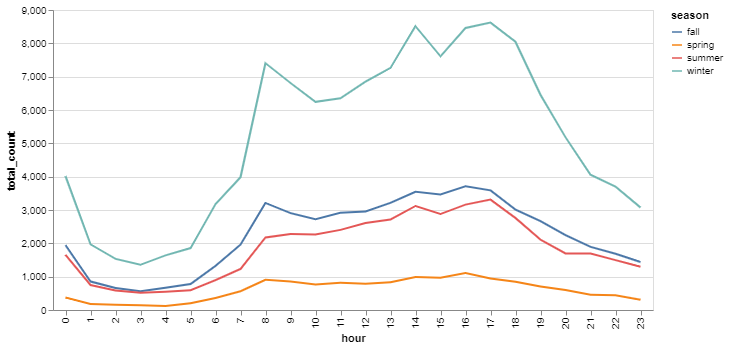

In [10]:
alt.Chart(total_by_hour).mark_line().encode(
    alt.X('hour:N'),
    alt.Y('total_count:Q'),
    color='season:N'
).properties(
    height = 300,
    width = 300 * 2
)

### Second, show the daily pattern of influence-incurred crashes of vehicle 1 by different month

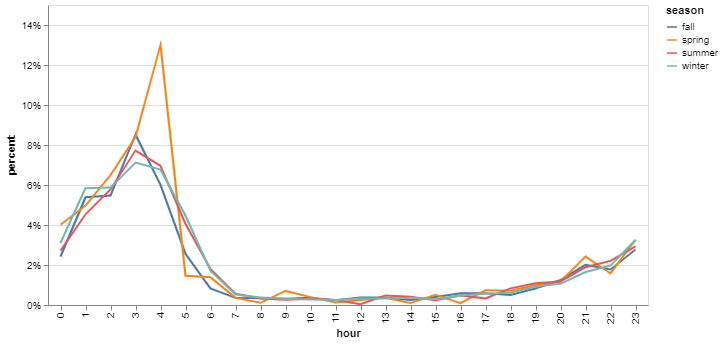

In [11]:
alt.Chart(pattern1).mark_line().encode(
    alt.X('hour:N'),
    alt.Y('percent:Q', axis=alt.Axis(format='%')),
    color='season:N'
).properties(
    height = 300,
    width = 300 * 2
)

### Next, show the daily pattern of influence-incurred crashes of vehicle 2 by different month

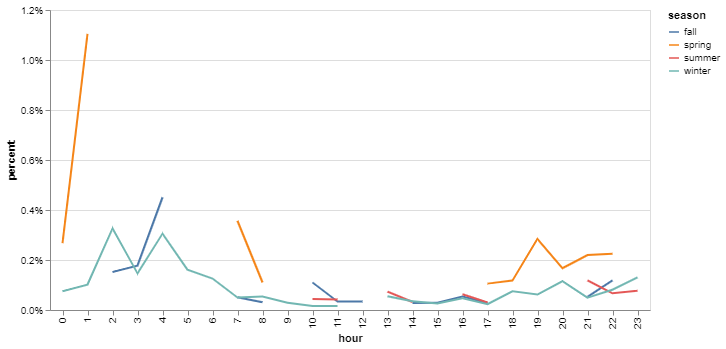

In [12]:
alt.Chart(pattern2).mark_line().encode(
    alt.X('hour:N'),
    alt.Y('percent:Q', axis=alt.Axis(format='%')),
    color='season:N'
).properties(
    height = 300,
    width = 300 * 2
)

# Question 2: Driver's responsibility(eletronic devices: headphone, mobile, fall asleep) vs non-person's responsibility (Glare/ animal actions) in the different boroughs? Particularly, are there reasonable number difference of alcohol invovlement in different Boroughs?? 

### The purpose of this question was to see and compare different contributing factors that happen in different Boroughs and to see whether the main cause is from the actual driver or some other factors. 

## Non-person's responsibility

## Data Transformation

### List out all contributing factors for vehicles, after comparison, we found out that there are total of 62 factors for all vehicles

In [13]:
con_fac_1 = df['CONTRIBUTING FACTOR VEHICLE 1'].unique()
#print(con_fac_1)

### Different non-driver causes were calculated and grouped by different boroughs to see the distrubtion

In [14]:
passive_cause = ['Brakes Defective','Obstruction/Debris','Shoulders Defective/Improper','Pavement Slippery',\
                 'Traffic Control Device Improper/Non-Working','View Obstructed/Limited',\
                 'Glare','Lane Marking Improper/Inadequate','Other Lighting Defects', 'Pavement Defective',\
                 'Tire Failure/Inadequate','Headlights Defective','Animals Action','Accelerator Defective',\
                 'Tow Hitch Defective','Vehicle Vandalism', 'Windshield Inadequate', 'Other Vehicular',\
                 'Outside Car Distraction','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',\
                 'Driverless/Runaway Vehicle', 'Tinted Windows' 
                ]

passive_cause_df1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(passive_cause)].groupby('BOROUGH').size().reset_index(name='pc1')
passive_cause_df2 = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(passive_cause)].groupby('BOROUGH').size().reset_index(name='pc2')
passive_cause_df1

,BOROUGH,pc1
0,BRONX,2362
1,BROOKLYN,3243
2,MANHATTAN,2686
3,QUEENS,2538
4,STATEN ISLAND,534


### Total counts of crashes grouped by different boroughs

In [15]:
total_by_borough = df.groupby(["BOROUGH"]).size().reset_index(name='count_borough_pc')
total_by_borough

,BOROUGH,count_borough_pc
0,BRONX,24880
1,BROOKLYN,50878
2,MANHATTAN,32088
3,QUEENS,44964
4,STATEN ISLAND,4848


### Percent was calculated and grouped with number of non-driver causes and number of Borough

In [16]:
pc_pattern1 = pd.DataFrame(passive_cause_df1).merge(pd.DataFrame(total_by_borough), left_on=["BOROUGH"], right_on=["BOROUGH"], how='outer')
pc_pattern2 = pd.DataFrame(passive_cause_df2).merge(pd.DataFrame(total_by_borough), left_on=["BOROUGH"], right_on=["BOROUGH"], how='outer')

pc_pattern1['percent_pc'] = (pc_pattern1['pc1']/pc_pattern1['count_borough_pc'])
pc_pattern2['percent_pc'] = (pc_pattern2['pc2']/pc_pattern1['count_borough_pc'])
pc_pattern1

,BOROUGH,pc1,count_borough_pc,percent_pc
0,BRONX,2362,24880,0.094936
1,BROOKLYN,3243,50878,0.063741
2,MANHATTAN,2686,32088,0.083707
3,QUEENS,2538,44964,0.056445
4,STATEN ISLAND,534,4848,0.110149


## Visualization

### First show the bar chart of the ratio of non-driver's caused crashed by different burough

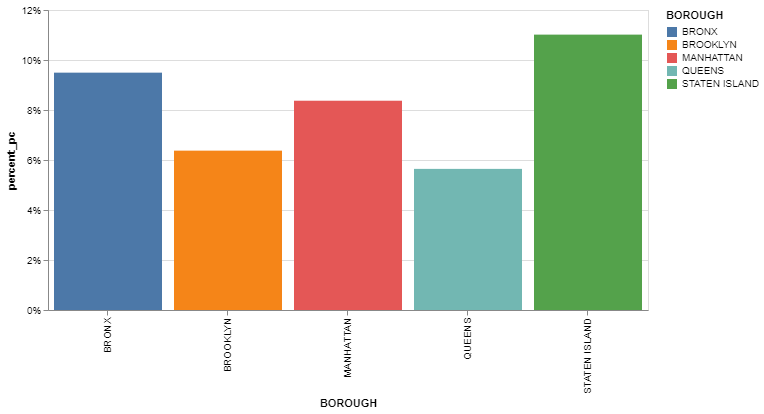

In [17]:
alt.Chart(pc_pattern1).mark_bar().encode(
    alt.X('BOROUGH:O'),
    alt.Y('percent_pc:Q', axis=alt.Axis(format='%')),
    color='BOROUGH:N'
).properties(
    height = 300,
    width = 300 * 2
)

### Then prep the map for NYC

{
"type": "FeatureCollect


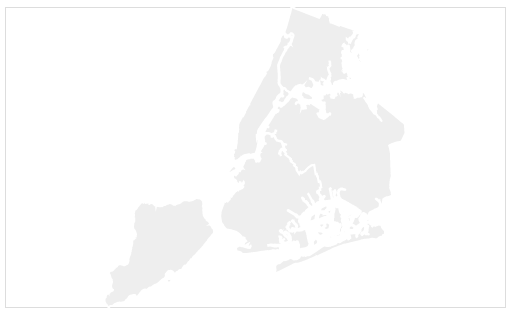

In [19]:
borough_data = open("boroughs.geojson.txt", "r")
print(borough_data.read(25))
borough_geo = alt.Data(url='boroughs.geojson.txt', format=alt.DataFormat(property='features',type='json'))

nyc_background = alt.Chart(borough_geo).mark_geoshape(
    stroke='white',
    strokeWidth=2
).encode(
    color=alt.value('#eee'),
).properties(
    width=500,
    height=300
)
#borough_geo
nyc_background

In [20]:
name2id = {
    "STATEN ISLAND": 0,
    "QUEENS": 1,
    "BROOKLYN": 2,
    "MANHATTAN": 3,
    "BRONX": 4,
}

b_ids = []
for idx, x in pc_pattern1.iterrows():
    if (x['BOROUGH'] in name2id):
        b_ids.append(name2id[x['BOROUGH']])
    else:
        b_ids.append(-1)
    
pc_pattern1['borough_id'] = b_ids

### Last show the map of the ratio of non-driver's caused crashed by different burough to show the distribution

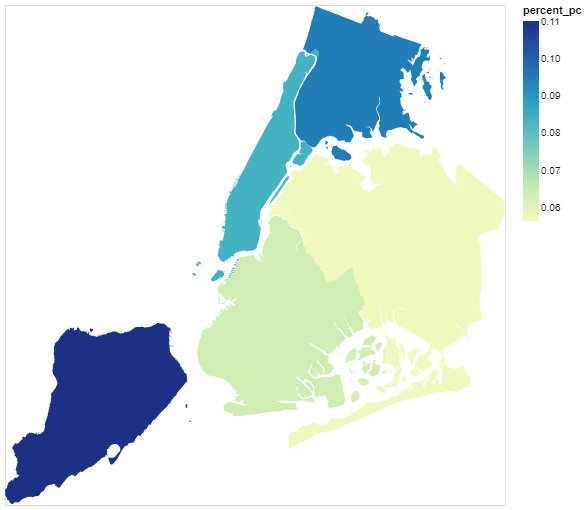

In [21]:
alt.Chart(borough_geo).mark_geoshape().encode(
    color='percent_pc:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pc_pattern1, 'borough_id', ['percent_pc'])
).properties(
    width=500,
    height=500
)

## Driver's responsibility

## Data Transformation

### Different driver causes were calculated and grouped by different boroughs to see the distrubtion

In [22]:
driver_cause = ['Passing or Lane Usage Improper','Driver Inattention/Distraction','Turning Improperly',\
                 'Following Too Closely','Failure to Yield Right-of-Way','Lost Consciousness',\
                 'Unsafe Lane Changing','Unsafe Speed','Backing Unsafely', 'Passing Too Closely',\
                 'Aggressive Driving/Road Rage','Fell Asleep','Failure to Keep Right','Cell Phone (hand-Held)',\
                 'Texting','Other Electronic Device', 'Listening/Using Headphones','Fatigued/Drowsy',\
                 'Traffic Control Disregarded','Driver Inexperience',\
                 'Prescription Medication','Physical Disability',\
                 'Drugs (illegal)','Illnes','Drugs (Illegal)','Illness','Eating or Drinking',\
                 'Cell Phone (hands-free)','Cell Phone (hands-free)','Using On Board Navigation Device',\
                 'Reaction to Other Uninvolved Vehicle','Cell Phone (hand-held)']

driver_cause_df1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(driver_cause)].groupby('BOROUGH').size().reset_index(name='dc1')
driver_cause_df1

,BOROUGH,dc1
0,BRONX,12494
1,BROOKLYN,29051
2,MANHATTAN,20394
3,QUEENS,29526
4,STATEN ISLAND,2847


In [23]:
total_by_borough = df.groupby(["BOROUGH"]).size().reset_index(name='count_borough_dc')
total_by_borough

,BOROUGH,count_borough_dc
0,BRONX,24880
1,BROOKLYN,50878
2,MANHATTAN,32088
3,QUEENS,44964
4,STATEN ISLAND,4848


### Percent was calculated and grouped with number of driver causes and number of Borough

In [24]:
dc_pattern1 = pd.DataFrame(driver_cause_df1).merge(pd.DataFrame(total_by_borough), left_on=["BOROUGH"], right_on=["BOROUGH"], how='outer')

dc_pattern1['percent_dc'] = (dc_pattern1['dc1']/dc_pattern1['count_borough_dc'])

b_ids = []
for idx, x in dc_pattern1.iterrows():
    if (x['BOROUGH'] in name2id):
        b_ids.append(name2id[x['BOROUGH']])
    else:
        b_ids.append(-1)
    
dc_pattern1['borough_id'] = b_ids
dc_pattern1

,BOROUGH,dc1,count_borough_dc,percent_dc,borough_id
0,BRONX,12494,24880,0.502170,4
1,BROOKLYN,29051,50878,0.570993,2
2,MANHATTAN,20394,32088,0.635565,3
3,QUEENS,29526,44964,0.656659,1
4,STATEN ISLAND,2847,4848,0.587252,0


### This chart was made to make a clear comparison of driver's responsibility causes and non-driver's responsibility causes that happen in different Borough 

In [25]:
both_pattern = pd.DataFrame(dc_pattern1).merge(pd.DataFrame(pc_pattern1), left_on=["borough_id","BOROUGH"], right_on=["borough_id","BOROUGH"], how='outer')
dc_pattern1['attr'] = "Driver Cause"
pc_pattern1['attr'] = "Non-Driver Cause"
test_pattern = pd.concat([dc_pattern1.rename(columns={'percent_dc':'percent'}),pc_pattern1.rename(columns={'percent_pc':'percent'})], ignore_index=True,sort=False)
test_pattern

,BOROUGH,dc1,count_borough_dc,percent,borough_id,attr,pc1,count_borough_pc
0,BRONX,12494.0,24880.0,0.502170,4,Driver Cause,NaN,NaN
1,BROOKLYN,29051.0,50878.0,0.570993,2,Driver Cause,NaN,NaN
2,MANHATTAN,20394.0,32088.0,0.635565,3,Driver Cause,NaN,NaN
3,QUEENS,29526.0,44964.0,0.656659,1,Driver Cause,NaN,NaN
4,STATEN ISLAND,2847.0,4848.0,0.587252,0,Driver Cause,NaN,NaN
5,BRONX,NaN,NaN,0.094936,4,Non-Driver Cause,2362.0,24880.0
6,BROOKLYN,NaN,NaN,0.063741,2,Non-Driver Cause,3243.0,50878.0
7,MANHATTAN,NaN,NaN,0.083707,3,Non-Driver Cause,2686.0,32088.0
8,QUEENS,NaN,NaN,0.056445,1,Non-Driver Cause,2538.0,44964.0
9,STATEN ISLAND,NaN,NaN,0.110149,0,Non-Driver Cause,534.0,4848.0


## Visualization

### We like to show the ratio comparison of the crashes caused by driver's and non-driver's by different burough

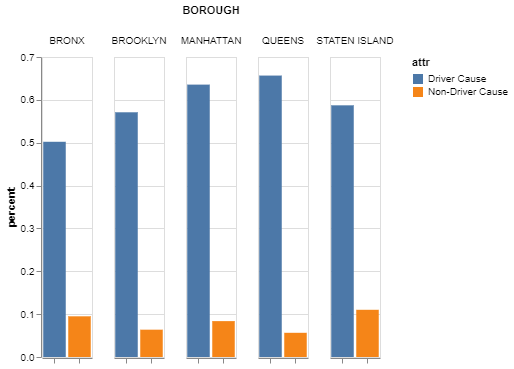

In [26]:
alt.Chart(test_pattern).mark_bar().encode(
    column = 'BOROUGH',
    x = alt.X('attr:N',axis=alt.Axis(title=None, labels=False)),
    y = alt.Y('percent:Q'),
    #alt.Column('attr:O'),
    color='attr:N'
).properties(
    height = 300,
    width = 50
)

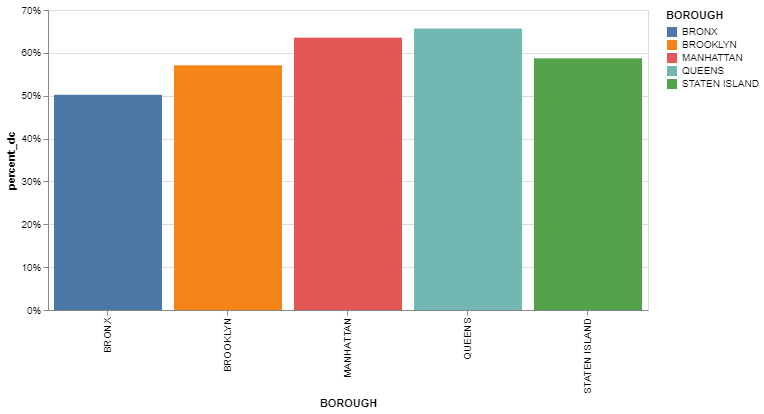

In [27]:
alt.Chart(dc_pattern1).mark_bar().encode(
    alt.X('BOROUGH:O'),
    alt.Y('percent_dc:Q', axis=alt.Axis(format='%')),
    color='BOROUGH:N'
).properties(
    height = 300,
    width = 300 * 2
)

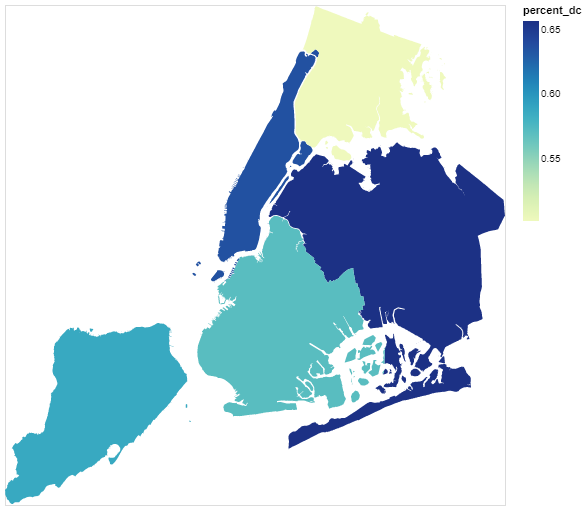

In [28]:
alt.Chart(borough_geo).mark_geoshape().encode(
    color='percent_dc:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(dc_pattern1, 'borough_id', ['percent_dc'])
).properties(
    width=500,
    height=500
)

## Are there reasonable number difference of alcohol involvement in city area vs rual area?

## Data Transformation

### Number of Alcohol Involvement was calculated and grouped with different Boroughs

In [29]:
alcohol_cause = ['Alcohol Involvement']
alcohol_cause_df1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(alcohol_cause)].groupby('BOROUGH').size().reset_index(name='alcohol1')

alcohol_cause_df1

,BOROUGH,alcohol1
0,BRONX,284
1,BROOKLYN,491
2,MANHATTAN,208
3,QUEENS,521
4,STATEN ISLAND,99


In [30]:
total_by_borough = df.groupby(["BOROUGH"]).size().reset_index(name='count_borough_ac')
total_by_borough

,BOROUGH,count_borough_ac
0,BRONX,24880
1,BROOKLYN,50878
2,MANHATTAN,32088
3,QUEENS,44964
4,STATEN ISLAND,4848


### Percent of alcohol involvement was grouped with different Boroughs to see the difference 

In [31]:
alcohol_pattern1 = pd.DataFrame(alcohol_cause_df1).merge(pd.DataFrame(total_by_borough), left_on=["BOROUGH"], right_on=["BOROUGH"], how='outer')
alcohol_pattern1['percent_ac'] = (alcohol_pattern1['alcohol1']/alcohol_pattern1['count_borough_ac'])

alcohol_pattern1

,BOROUGH,alcohol1,count_borough_ac,percent_ac
0,BRONX,284,24880,0.011415
1,BROOKLYN,491,50878,0.009651
2,MANHATTAN,208,32088,0.006482
3,QUEENS,521,44964,0.011587
4,STATEN ISLAND,99,4848,0.020421


## Visualization

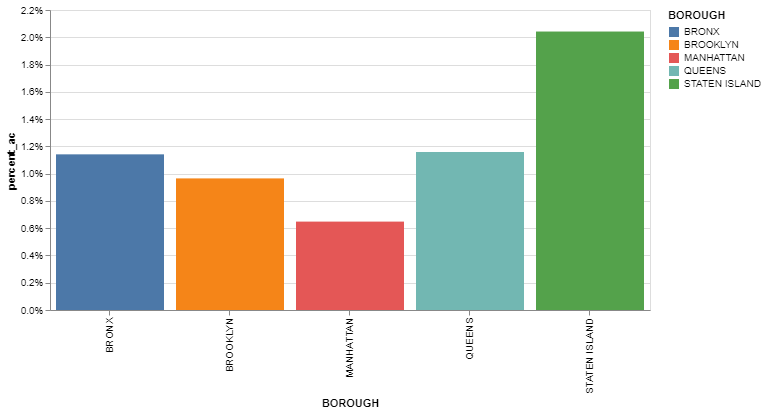

In [32]:
alt.Chart(alcohol_pattern1).mark_bar().encode(
    alt.X('BOROUGH:O'),
    alt.Y('percent_ac:Q', axis=alt.Axis(format='%')),
    color='BOROUGH:N'
).properties(
    height = 300,
    width = 300 * 2
)

In [33]:
b_ids = []
for idx, x in alcohol_pattern1.iterrows():
    if (x['BOROUGH'] in name2id):
        b_ids.append(name2id[x['BOROUGH']])
    else:
        b_ids.append(-1)
alcohol_pattern1['borough_id'] = b_ids

alcohol_pattern1       

,BOROUGH,alcohol1,count_borough_ac,percent_ac,borough_id
0,BRONX,284,24880,0.011415,4
1,BROOKLYN,491,50878,0.009651,2
2,MANHATTAN,208,32088,0.006482,3
3,QUEENS,521,44964,0.011587,1
4,STATEN ISLAND,99,4848,0.020421,0


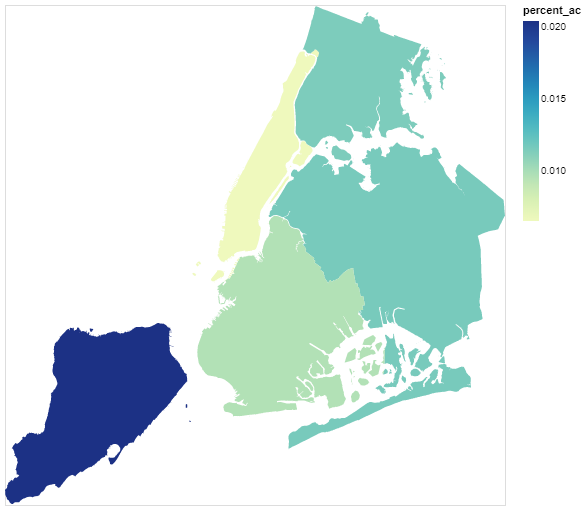

In [34]:
alt.Chart(borough_geo).mark_geoshape().encode(
    color='percent_ac:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(alcohol_pattern1, 'borough_id', ['percent_ac'])
).properties(
    width=500,
    height=500
)

# Question 3: Which kind of types of vechile are most likely involoved in dirver's responsibility crash, and which are most likely involoved in non-dirver's responsibility crash

## Data Trasformation:


### First extract coloumn of 'CONTRIBUTING FACTOR VEHICLE 1', find all elements in dirver_cause, then group by 'VEHICLE TYPE CODE 1', then count the number of each different type of vechiles

In [35]:
diff_vechile = df['VEHICLE TYPE CODE 1'].value_counts()
diff_vechile

Sedan                                  66598
Station Wagon/Sport Utility Vehicle    57699
PASSENGER VEHICLE                      42196
SPORT UTILITY / STATION WAGON          27241
Taxi                                    6929
Pick-up Truck                           4449
TAXI                                    4089
Box Truck                               3071
Bus                                     2446
PICK-UP TRUCK                           2018
Bike                                    1208
OTHER                                   1204
VAN                                     1171
Tractor Truck Diesel                    1132
UNKNOWN                                 1085
TK                                       911
Van                                      890
BU                                       828
Motorcycle                               784
SMALL COM VEH(4 TIRES)                   701
BUS                                      696
LIVERY VEHICLE                           692
LARGE COM 

In [36]:
vechile_type_dirver_cause = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(driver_cause)].groupby('VEHICLE TYPE CODE 1').size().reset_index(name='count')
vechile_type_dirver_cause

,VEHICLE TYPE CODE 1,count
0,2 dr sedan,14
1,2015,1
2,3-Door,12
3,315 e,1
4,3D,7
5,4 dr sedan,144
6,AM,80
7,AMB,4
8,AMBU,6
9,AMBUL,53


### Sort by count of crashes for each type of the vehicle

In [37]:
driver_c = vechile_type_dirver_cause.sort_values(by=['count'],ascending=False).head(20)
driver_c

,VEHICLE TYPE CODE 1,count
191,Sedan,42859
196,Station Wagon/Sport Utility Vehicle,38684
147,PASSENGER VEHICLE,23595
183,SPORT UTILITY / STATION WAGON,16643
218,Taxi,4850
164,Pick-up Truck,2994
201,TAXI,2681
34,Box Truck,2113
38,Bus,1568
151,PICK-UP TRUCK,1256


In [38]:
driver_c = driver_c[:5]
driver_c

,VEHICLE TYPE CODE 1,count
191,Sedan,42859
196,Station Wagon/Sport Utility Vehicle,38684
147,PASSENGER VEHICLE,23595
183,SPORT UTILITY / STATION WAGON,16643
218,Taxi,4850


### we repeat the same procedure as above, but count the number of each different type of vechiles for non driver cause

In [39]:
vechile_type_nondirver_cause = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(passive_cause)].groupby('VEHICLE TYPE CODE 1').size().reset_index(name='count')
vechile_type_nondirver_cause

,VEHICLE TYPE CODE 1,count
0,2 dr sedan,3
1,3-Door,1
2,4 dr sedan,14
3,4whee,1
4,AM,12
5,AMB,1
6,AMBUL,14
7,AMBULANCE,28
8,AR,3
9,Ambulance,36


In [40]:
nondriver_cause = vechile_type_nondirver_cause.sort_values(by=['count'],ascending=False).head(20)
nondriver_cause 


,VEHICLE TYPE CODE 1,count
92,Sedan,4284
95,Station Wagon/Sport Utility Vehicle,3616
74,PASSENGER VEHICLE,3537
89,SPORT UTILITY / STATION WAGON,2360
105,Taxi,466
97,TAXI,377
80,Pick-up Truck,283
18,Box Truck,201
76,PICK-UP TRUCK,184
17,Bike,171


In [41]:
nondriver_cause = nondriver_cause[:5]
nondriver_cause 

,VEHICLE TYPE CODE 1,count
92,Sedan,4284
95,Station Wagon/Sport Utility Vehicle,3616
74,PASSENGER VEHICLE,3537
89,SPORT UTILITY / STATION WAGON,2360
105,Taxi,466


In [42]:
diff_vechile = diff_vechile[:5]
diff_vechile

Sedan                                  66598
Station Wagon/Sport Utility Vehicle    57699
PASSENGER VEHICLE                      42196
SPORT UTILITY / STATION WAGON          27241
Taxi                                    6929
Name: VEHICLE TYPE CODE 1, dtype: int64

In [43]:
#nondriver_cause = nondriver_cause.rename(columns={"count": "count_2"})

### Then we count the total number of crash for each type of vehicles and calculate the percentage for each type of veichles

In [44]:
to = list(diff_vechile)
nondriver_cause['total'] = to
nondriver_cause['percent'] = nondriver_cause['count']/nondriver_cause['total']

In [45]:
nondriver_cause

,VEHICLE TYPE CODE 1,count,total,percent
92,Sedan,4284,66598,0.064326
95,Station Wagon/Sport Utility Vehicle,3616,57699,0.062670
74,PASSENGER VEHICLE,3537,42196,0.083823
89,SPORT UTILITY / STATION WAGON,2360,27241,0.086634
105,Taxi,466,6929,0.067254


In [46]:
to = list(diff_vechile)
driver_c['total'] = to
driver_c['percent'] = driver_c['count']/driver_c['total']

In [47]:
driver_c

,VEHICLE TYPE CODE 1,count,total,percent
191,Sedan,42859,66598,0.643548
196,Station Wagon/Sport Utility Vehicle,38684,57699,0.670445
147,PASSENGER VEHICLE,23595,42196,0.559176
183,SPORT UTILITY / STATION WAGON,16643,27241,0.610954
218,Taxi,4850,6929,0.699957


In [48]:
attr = ['dirver cause','dirver cause','dirver cause','dirver cause','dirver cause','non_dirver cause','non_dirver cause','non_dirver cause','non_dirver cause','non_dirver cause']

In [49]:
comp_cause = driver_c.append(nondriver_cause)

In [50]:
comp_cause['attr'] = attr

In [51]:
comp_cause

,VEHICLE TYPE CODE 1,count,total,percent,attr
191,Sedan,42859,66598,0.643548,dirver cause
196,Station Wagon/Sport Utility Vehicle,38684,57699,0.670445,dirver cause
147,PASSENGER VEHICLE,23595,42196,0.559176,dirver cause
183,SPORT UTILITY / STATION WAGON,16643,27241,0.610954,dirver cause
218,Taxi,4850,6929,0.699957,dirver cause
92,Sedan,4284,66598,0.064326,non_dirver cause
95,Station Wagon/Sport Utility Vehicle,3616,57699,0.062670,non_dirver cause
74,PASSENGER VEHICLE,3537,42196,0.083823,non_dirver cause
89,SPORT UTILITY / STATION WAGON,2360,27241,0.086634,non_dirver cause
105,Taxi,466,6929,0.067254,non_dirver cause


## Visualization

### Comparison of Driver's caused crashes vs non driver's caused crashes for each vehicle type

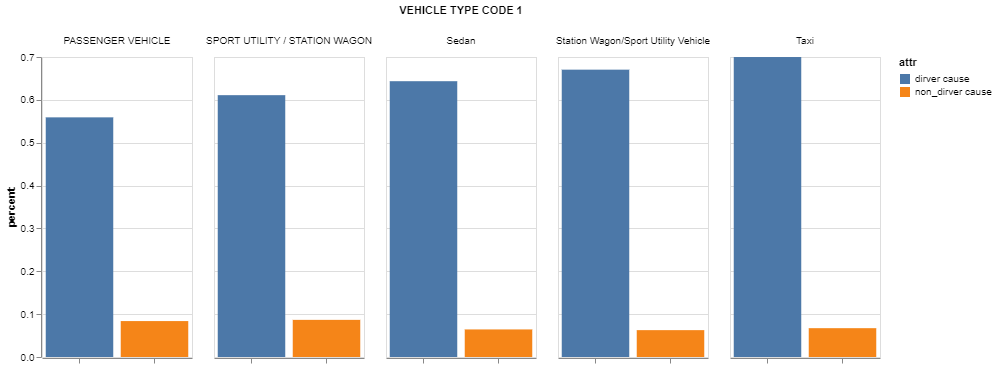

In [52]:
alt.Chart(comp_cause).mark_bar().encode(
    column = 'VEHICLE TYPE CODE 1',
    x = alt.X('attr:N',axis=alt.Axis(title=None, labels=False)),
    y = alt.Y('percent:Q'),
    color='attr:N'
).properties(
    height = 300,
    width = 150
)